Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


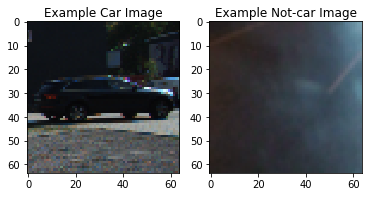

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from sklearn.preprocessing import StandardScaler

%matplotlib inline


def read_images():
    cars = []
    notcars = []
    for image in glob.iglob('**/*.png', recursive=True):
        if 'non-vehicles' in image:
            notcars.append(image)
        else:
            cars.append(image)
    return cars, notcars

cars, notcars = read_images()
        
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')

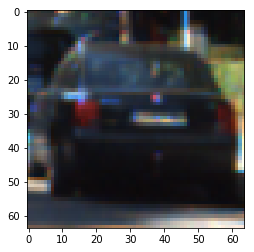

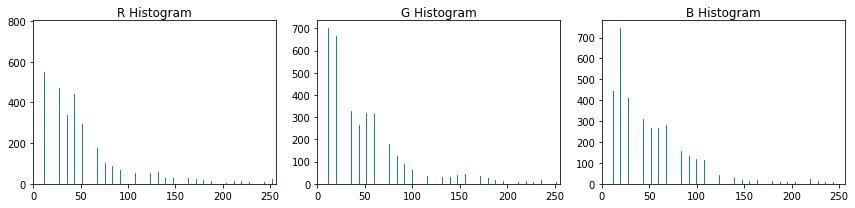

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

car_ind = np.random.randint(0, len(cars))
image = mpimg.imread(cars[car_ind])
plt.imshow(image)

# Define a function to compute color histogram features  
def rgb_color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

    
rh, gh, bh, bincen, feature_vec = rgb_color_hist((image * 255).round().astype(np.uint8), nbins=32, bins_range=(0, 256))


# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

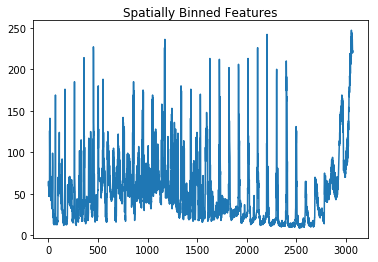

In [15]:
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features
    
feature_vec = bin_spatial((image * 255).round().astype(np.uint8), size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')

In [16]:
def extract_color_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        image = (image * 255).round().astype(np.uint8)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
    # Return list of feature vectors
    return features
        
spatial_size = 32
hist_bins = 32
car_color_features = extract_color_features(cars, cspace='RGB', spatial_size=(spatial_size, spatial_size),
                        hist_bins=hist_bins, hist_range=(0, 256))
notcar_color_features = extract_color_features(notcars, cspace='RGB', spatial_size=(spatial_size, spatial_size),
                        hist_bins=hist_bins, hist_range=(0, 256))

if len(car_color_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_color_features, notcar_color_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

KeyboardInterrupt: 

In [ ]:
import time
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split


spatial = 16
histbin = 128

car_color_features = extract_color_features(cars, cspace='YUV', spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))
notcar_color_features = extract_color_features(notcars, cspace='YUV', spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))

# Create an array stack of feature vectors
X = np.vstack((car_color_features, notcar_color_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_color_features)), np.zeros(len(notcar_color_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using spatial binning of:',spatial,
    'and', histbin,'histogram bins')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

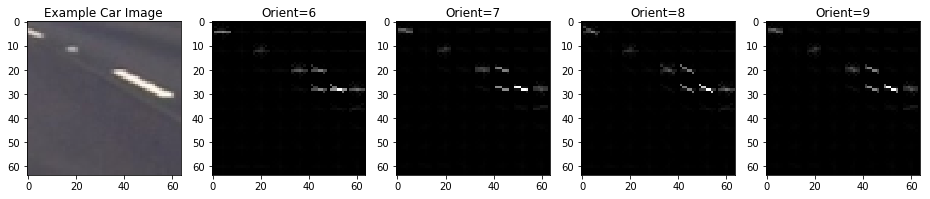

In [46]:
from skimage.feature import hog

def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

#image = mpimg.imread(cars[180])
image = mpimg.imread(notcars[270])
    
gray = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

orient = 8
pix_per_cell = 8
cell_per_block = 2
features, hog_image6 = get_hog_features(gray[:,:,0], 6, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features, hog_image7 = get_hog_features(gray[:,:,0], 7, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features, hog_image8 = get_hog_features(gray[:,:,0], 8, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
features, hog_image9 = get_hog_features(gray[:,:,0], 9, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


fig = plt.figure(figsize=(16,8))
plt.subplot(151)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(152)
plt.imshow(hog_image6, cmap='gray')
plt.title('Orient=6')
plt.subplot(153)
plt.imshow(hog_image7, cmap='gray')
plt.title('Orient=7')
plt.subplot(154)
plt.imshow(hog_image8, cmap='gray')
plt.title('Orient=8')
plt.subplot(155)
plt.imshow(hog_image9, cmap='gray')
plt.title('Orient=9')


In [38]:
import time
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split

def extract_hog_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features

In [9]:



# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
# sample_size = 500
# cars = cars[0:sample_size]
# notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
colorspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"

t=time.time()
car_hog_features = extract_hog_features(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_hog_features = extract_hog_features(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')
# Create an array stack of feature vectors
X = np.vstack((car_hog_features, notcar_hog_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_hog_features)), np.zeros(len(notcar_hog_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

86.23 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 5292
23.0 Seconds to train SVC...
Test Accuracy of SVC =  0.9809
My SVC predicts:  [ 0.  1.  0.  0.  1.  0.  1.  0.  0.  0.]
For these 10 labels:  [ 0.  1.  0.  1.  1.  0.  1.  0.  0.  0.]
0.0065 Seconds to predict 10 labels with SVC


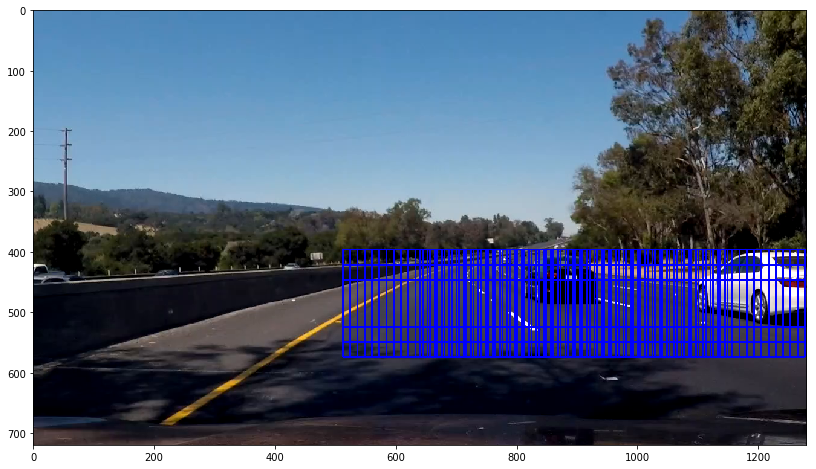

In [19]:
image = mpimg.imread('test4.jpg')
image = test_image18

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    imcopy = np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    return imcopy
    
    
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    window_list = []
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            window_list.append(((startx, starty), (endx, endy)))
    return window_list


windows = slide_window(test_image42, x_start_stop=[int(image.shape[1] * 0.4), int(image.shape[1] * 1.0)], 
                       y_start_stop=[int(image.shape[0] * 0.55), int(image.shape[0] * 0.8)], 
                    xy_window=(128, 128), xy_overlap=(0.9, 0.8))
                       
window_img = draw_boxes(test_image42, windows, color=(0, 0, 255), thick=2)     
plt.figure(figsize=(16,8))
plt.imshow(window_img)

In [22]:
def extract_features(imgs, color_space='YUV', spatial_size=(16, 16),
                        hist_bins=128, orient=7, 
                        pix_per_cell=8, cell_per_block=2, hog_channel="ALL",
                        spatial_feat=False, hist_feat=False, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)
            else: 
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

In [20]:
def single_img_features(img, color_space='YUV', spatial_size=(16, 16),
                        hist_bins=128, orient=7, 
                        pix_per_cell=8, cell_per_block=2, hog_channel="ALL",
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    img_features = []
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        img_features.append(spatial_features)
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        img_features.append(hist_features)
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        img_features.append(hog_features)

    return np.concatenate(img_features)

def search_windows(img, windows, clf, scaler, color_space='YUV', 
                    spatial_size=(16, 16), hist_bins=128, 
                    hist_range=(0, 256), orient=7, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel="ALL", spatial_feat=False, 
                    hist_feat=False, hog_feat=True):
    on_windows = []
    for window in windows:
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        prediction = clf.predict(test_features)
        if prediction == 1:
            on_windows.append(window)
    return on_windows
    
    


In [25]:
import time
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split

color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 7  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 128    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = False # Histogram features on or off
hog_feat = True # HOG features on or off


car_features = extract_features(cars)
notcar_features = extract_features(notcars)

X = np.vstack((car_features, notcar_features)).astype(np.float64)          
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)

y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
   'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()


Using: 7 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 4116
23.09 Seconds to train SVC...
Test Accuracy of SVC =  0.9758


In [17]:
import pickle
s = pickle.dumps(svc)
#svc2 = pickle.loads(s)

In [ ]:
svc2

(720, 1280, 3)


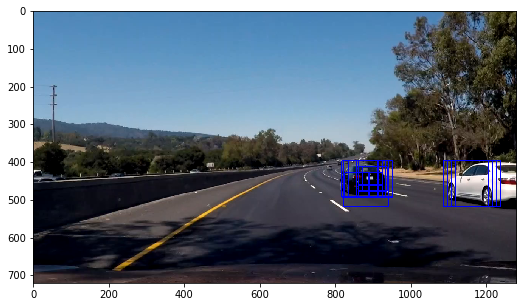

In [26]:
image = test_image42
print(image.shape)

x_start_stop_large = [int(image.shape[1] * 0.4), int(image.shape[1] * 1.0)] 
y_start_stop_large = [int(image.shape[0] * 0.55), int(image.shape[0] * 0.9)] 
x_start_stop_medium = [int(image.shape[1] * 0.4), int(image.shape[1] * 1.0)]
y_start_stop_medium = [int(image.shape[0] * 0.55), int(image.shape[0] * 0.8)]
x_start_stop_small = [int(image.shape[1] * 0.4), int(image.shape[1] * 0.85)]
y_start_stop_small = [int(image.shape[0] * 0.55), int(image.shape[0] * 0.8)]
x_start_stop_xs = [int(image.shape[1] * 0.4), int(image.shape[1] * 0.85)]
y_start_stop_xs = [int(image.shape[0] * 0.55), int(image.shape[0] * 0.77)]
x_start_stop_xxs = [int(image.shape[1] * 0.5), int(image.shape[1] * 0.7)]
y_start_stop_xxs = [int(image.shape[0] * 0.55), int(image.shape[0] * 0.61)]

draw_img = np.copy(image)
image = image.astype(np.float32)/255


windows = slide_window(image, x_start_stop=x_start_stop_large, y_start_stop=y_start_stop_large, 
                  xy_window=(150, 150), xy_overlap=(0.9, 0.8))
windows += slide_window(image, x_start_stop=x_start_stop_medium, y_start_stop=y_start_stop_medium, 
                  xy_window=(120, 120), xy_overlap=(0.9, 0.8))
windows += slide_window(image, x_start_stop=x_start_stop_small, y_start_stop=y_start_stop_small, 
                  xy_window=(96, 96), xy_overlap=(0.8, 0.75))
windows += slide_window(image, x_start_stop=x_start_stop_xs, y_start_stop=y_start_stop_xs, 
                  xy_window=(64, 64), xy_overlap=(0.8, 0.75))
#windows += slide_window(image, x_start_stop=x_start_stop_xxs, y_start_stop=y_start_stop_xxs, 
#                  xy_window=(36, 36), xy_overlap=(0.75, 0.75))
hot_windows = search_windows(image, windows, svc, X_scaler)   

window_img = draw_boxes(draw_img, hot_windows, color=(0, 0, 255), thick=2)                    


fig = plt.figure(figsize=(10,5))
plt.imshow(window_img)

(720, 1280, 3)


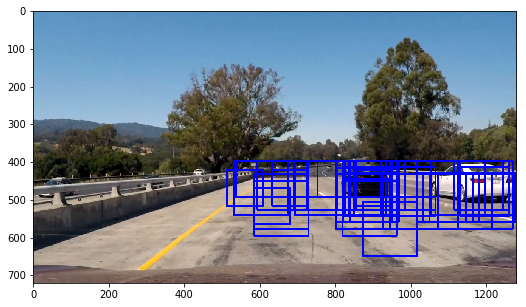

In [75]:
image = mpimg.imread('test4.jpg')
print(image.shape)


x_start_stop_large = [int(image.shape[1] * 0.4), int(image.shape[1] * 1.0)] 
y_start_stop_large = [int(image.shape[0] * 0.55), int(image.shape[0] * 0.9)] 
x_start_stop_medium = [int(image.shape[1] * 0.4), int(image.shape[1] * 1.0)]
y_start_stop_medium = [int(image.shape[0] * 0.55), int(image.shape[0] * 0.8)]
x_start_stop_small = [int(image.shape[1] * 0.4), int(image.shape[1] * 0.85)]
y_start_stop_small = [int(image.shape[0] * 0.55), int(image.shape[0] * 0.8)]
x_start_stop_xs = [int(image.shape[1] * 0.4), int(image.shape[1] * 0.9)]
y_start_stop_xs = [int(image.shape[0] * 0.5), int(image.shape[0] * 0.7)]
x_start_stop_xxs = [int(image.shape[1] * 0.5), int(image.shape[1] * 0.7)]
y_start_stop_xxs = [int(image.shape[0] * 0.55), int(image.shape[0] * 0.61)]

image = test_image40
draw_img = np.copy(image)
image = image.astype(np.float32) / 255



#windows = slide_window(image, x_start_stop=x_start_stop_large, y_start_stop=y_start_stop_large, 
#                  xy_window=(144, 144), xy_overlap=(0.9, 0.8))
#windows += slide_window(image, x_start_stop=x_start_stop_medium, y_start_stop=y_start_stop_medium, 
#                  xy_window=(130, 130), xy_overlap=(0.9, 0.8))
#windows += slide_window(image, x_start_stop=x_start_stop_small, y_start_stop=y_start_stop_small, 
#                  xy_window=(96, 96), xy_overlap=(0.8, 0.7))
#windows = slide_window(image, x_start_stop=x_start_stop_xs, y_start_stop=y_start_stop_xs, 
#                  xy_window=(64, 64), xy_overlap=(0.5, 0.5))
#windows = slide_window(image, x_start_stop=x_start_stop_xxs, y_start_stop=y_start_stop_xxs, 
#                  xy_window=(24, 24), xy_overlap=(0.6, 0.6))
#hot_windows = search_windows(image, windows, svc, X_scaler)            

hot_windows = search_car_hog(image, 
                             ((x_start_stop_large[0], y_start_stop_large[0]), (x_start_stop_large[1], y_start_stop_large[1])), 
                             64 / 144, 1, 
                             X_scaler, svc)
hot_windows += search_car_hog(image, 
                             ((x_start_stop_medium[0], y_start_stop_medium[0]), (x_start_stop_medium[1], y_start_stop_medium[1])), 
                             64 / 130, 1, 
                             X_scaler, svc)
hot_windows += search_car_hog(image, 
                             ((x_start_stop_small[0], y_start_stop_small[0]), (x_start_stop_small[1], y_start_stop_small[1])), 
                             64 / 96, 2, 
                             X_scaler, svc)



window_img = draw_boxes(draw_img, hot_windows, color=(0, 0, 255), thick=3)                    


fig = plt.figure(figsize=(10,5))
plt.imshow(window_img)

In [13]:
def prepare_hog_map(img, color_space='YUV'):
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: 
        feature_image = np.copy(img) 
    ch1 = feature_image[:,:,0]
    ch2 = feature_image[:,:,1]
    ch3 = feature_image[:,:,2]
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    return hog1, hog2, hog3

In [ ]:
def convert_color(img, color_space='YUV')

In [ ]:
hog1, hog2, hog3 = prepare_hog_map(image)
print(image.shape)
print(hog1.shape)

In [ ]:
window = windows[1]
print(window)
test_img = cv2.resize(image[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))  
orient=9
pix_per_cell=8
cell_per_block=2
hf = get_hog_features(test_img[:,:,0],
                       orient, pix_per_cell, cell_per_block, 
                       vis=False, feature_vec=True)
print(hf)

In [277]:
simage = mpimg.imread(cars[1])
#simage = cv2.resize(simage, (59, 59))
hf = get_hog_features(simage[:,:,0],
                       10, pix_per_cell, 1, 
                       vis=False, feature_vec=False)
print(hf.shape)
print(simage.shape)

(8, 8, 1, 1, 10)
(64, 64, 3)


In [48]:
def search_car_hog(img, large_window, scale, step_shift, scaler, svc, orient=9, window=64, pix_per_cell=8, cell_per_block=2):
    part_image = img[large_window[0][1]:large_window[1][1], large_window[0][0]:large_window[1][0]]
    resized_image = cv2.resize(part_image, (np.int(part_image.shape[1]*scale), np.int(part_image.shape[0]*scale)))
    ch0 = resized_image[:,:,0]
    hm0 = get_hog_features(ch0, orient, pix_per_cell, cell_per_block, vis=False, feature_vec = False)
    ch1 = resized_image[:,:,1]
    hm1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, vis=False, feature_vec = False)
    ch2 = resized_image[:,:,2]
    hm2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, vis=False, feature_vec = False)
    
    w = resized_image.shape[1] 
    h = resized_image.shape[0]
    w_cell = w // pix_per_cell
    h_cell = h // pix_per_cell
    window_cell = window // pix_per_cell
    
    on_windows = []
    for y in range(0, h_cell - window_cell + 1, step_shift):
        for x in range(0, w_cell - window_cell + 1, step_shift):
            window_hog0 = hm0[y:y+(window_cell - cell_per_block + 1), x:x+(window_cell - cell_per_block + 1)].ravel()
            window_hog1 = hm1[y:y+(window_cell - cell_per_block + 1), x:x+(window_cell - cell_per_block + 1)].ravel()
            window_hog2 = hm2[y:y+(window_cell - cell_per_block + 1), x:x+(window_cell - cell_per_block + 1)].ravel()
            #window_hog0 = ch0[y*pix_per_cell:y*pix_per_cell+64, x*pix_per_cell:x*pix_per_cell+64]
            #window_hog1 = ch1[y*pix_per_cell:y*pix_per_cell+64, x*pix_per_cell:x*pix_per_cell+64]
            #window_hog2 = ch2[y*pix_per_cell:y*pix_per_cell+64, x*pix_per_cell:x*pix_per_cell+64]
            #window_hog0 = get_hog_features(window_hog0, orient, pix_per_cell, cell_per_block, vis=False, feature_vec = True)
            #window_hog1 = get_hog_features(window_hog1, orient, pix_per_cell, cell_per_block, vis=False, feature_vec = True)
            #window_hog2 = get_hog_features(window_hog2, orient, pix_per_cell, cell_per_block, vis=False, feature_vec = True)
            hog_features = np.hstack((window_hog0, window_hog1, window_hog2))
            test_features = scaler.transform(np.array(hog_features).reshape(1, -1))
            prediction = svc.predict(test_features)
            if prediction == 1:
                x_large = int(large_window[0][0] + (x * pix_per_cell) / scale)
                y_large = int(large_window[0][1] + (y * pix_per_cell) / scale)
                box = ((x_large, y_large), (x_large + int(window / scale), y_large + int(window / scale)))
                on_windows.append(box)
            
    return on_windows

orient 9
pix_per_cell 8
cell_per_block 2
spatial_size (16, 16)
hist_bins 128


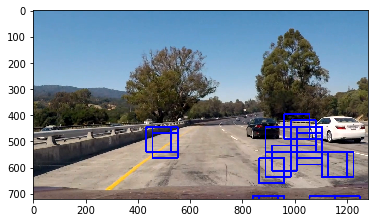

In [35]:
print("orient", orient)
print("pix_per_cell", pix_per_cell)
print("cell_per_block", cell_per_block)
print("spatial_size", spatial_size)
print("hist_bins", hist_bins)

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = int((nxblocks - nblocks_per_window) / cells_per_step)
    nysteps = int((nyblocks - nblocks_per_window) / cells_per_step)
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = int(yb*cells_per_step)
            xpos = int(xb*cells_per_step)
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            #subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            #spatial_features = bin_spatial(subimg, size=spatial_size)
            #hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.array(hog_features)).reshape(1, -1)    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return draw_img
    

#image = mpimg.imread('test1.jpg')
image = test_image40
ystart = int(image.shape[0] * 0.45)
ystop = int(image.shape[0] * 1.0)
scale = 1.5
#plt.imshow(image)
out_img = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

#norm_img = cv2.cvtColor(out_img, cv2.COLOR_YUV2RGB)
plt.figure()
plt.imshow(out_img)

In [27]:
from scipy.ndimage.measurements import label

heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 3)
    # Return the image
    return img



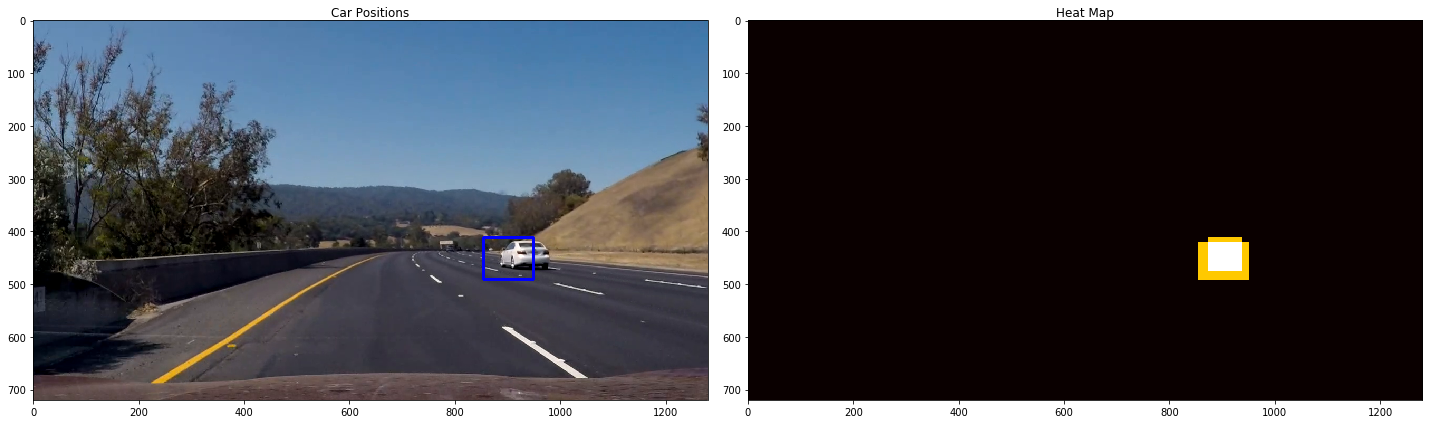

In [113]:
image = test_image25
draw_img = np.copy(image)

heat = np.zeros_like(image[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = add_heat(heat, hot_windows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(draw_img, labels)


fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


In [35]:
#prev_hot_windows1 = []
#prev_hot_windows2 = []

heat_cache = []
heat_count = 0
heat_length = 10

def process_image(img):
    global heat_cache
    global heat_count
    global heat_length
#    global prev_hot_windows1
#    global prev_hot_windows2
    draw_img = np.copy(img)
    image = img.astype(np.float32)/255
    
    windows = slide_window(image, x_start_stop=x_start_stop_large, y_start_stop=y_start_stop_large, 
                      xy_window=(150, 150), xy_overlap=(0.9, 0.8))
    windows += slide_window(image, x_start_stop=x_start_stop_medium, y_start_stop=y_start_stop_medium, 
                      xy_window=(120, 120), xy_overlap=(0.9, 0.8))
    windows += slide_window(image, x_start_stop=x_start_stop_small, y_start_stop=y_start_stop_small, 
                      xy_window=(96, 96), xy_overlap=(0.8, 0.75))
    windows += slide_window(image, x_start_stop=x_start_stop_xs, y_start_stop=y_start_stop_xs, 
                      xy_window=(64, 64), xy_overlap=(0.8, 0.75))
    
    hot_windows = search_windows(image, windows, svc, X_scaler)
    
    #hot_windows = search_car_hog(image, 
    #                         ((x_start_stop_large[0], y_start_stop_large[0]), (x_start_stop_large[1], y_start_stop_large[1])), 
    #                         64 / 144, 1, 
    #                         X_scaler, svc)
    #hot_windows += search_car_hog(image, 
    #                         ((x_start_stop_medium[0], y_start_stop_medium[0]), (x_start_stop_medium[1], y_start_stop_medium[1])), 
    #                         64 / 130, 1, 
    #                         X_scaler, svc)
    #hot_windows += search_car_hog(image, 
    #                         ((x_start_stop_small[0], y_start_stop_small[0]), (x_start_stop_small[1], y_start_stop_small[1])), 
    #                         64 / 96, 1, 
    #                         X_scaler, svc)
    
    heat_cache.append(hot_windows)
    heat_count += 1
    if heat_count == heat_length+1 :
        heat_cache = heat_cache[1:]
        heat_count = heat_length
        
    hot_windows = [item for sublist in heat_cache for item in sublist]
    
    #window_hot_img = draw_boxes(draw_img, hot_windows, color=(0, 0, 255), thick=2)        
    #fig = plt.figure(figsize=(20,10))
    #plt.subplot(121)
    #plt.imshow(window_hot_img)
    #plt.title('Before Heat')

    
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    heat = add_heat(heat, hot_windows)
    if heat_count > 3:
        heat = apply_threshold(heat, 2 * heat_count - 3)
    else:
        heat = apply_threshold(heat, 2 * heat_count - 1)
    heatmap = np.clip(heat, 0, 255)
    
    
    
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(draw_img, labels)
    
    #plt.subplot(122)
    #plt.imshow(draw_img)
    #plt.title('After Heat')
    #fig.tight_layout()
    
    #prev_hot_windows2 = prev_hot_windows1
    #prev_hot_windows1 = hot_windows
    
    return draw_img

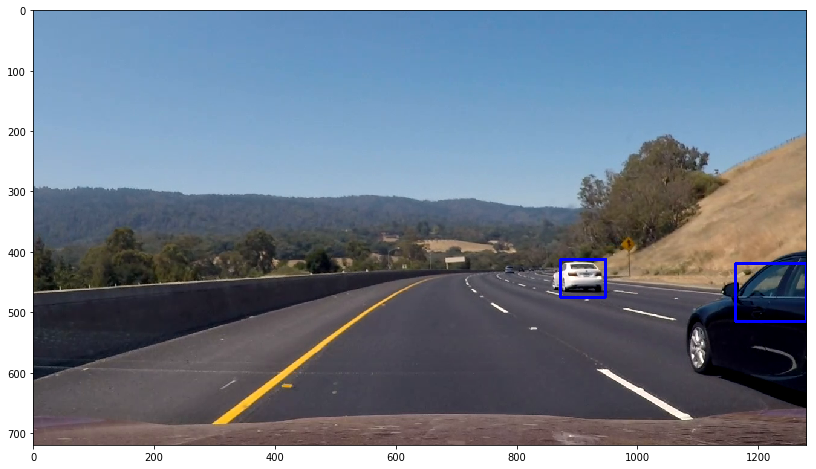

In [33]:
#image = mpimg.imread('test5.jpg')
plt.figure(figsize=(16,8))
plt.imshow(process_image(test_image28))

In [12]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

project_output = 'project_video_result.mp4'
clip1 = VideoFileClip("project_video.mp4")
#white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
#%time white_clip.write_videofile(project_output, audio=False)

In [36]:
miniclip = clip1.subclip(t_start=23, t_end=24)
white_clip = miniclip.fl_image(process_image)
%time white_clip.write_videofile(project_output, audio=False)

[MoviePy] >>>> Building video project_video_result.mp4
[MoviePy] Writing video project_video_result.mp4



  8%|███▎                                       | 2/26 [00:52<10:30, 26.29s/it]

KeyboardInterrupt: 

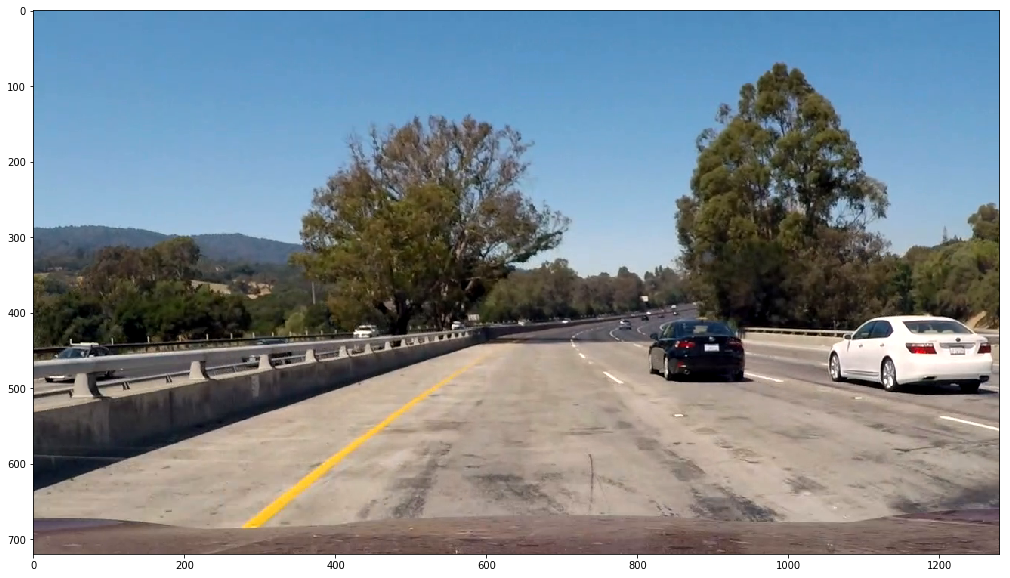

In [13]:
test_image10 = clip1.get_frame(10)
test_image14 = clip1.get_frame(14)
test_image18 = clip1.get_frame(18)
test_image22 = clip1.get_frame(22)
test_image30 = clip1.get_frame(30)
test_image37 = clip1.get_frame(37)
test_image40 = clip1.get_frame(40)
test_image42 = clip1.get_frame(42)
test_image25 = clip1.get_frame(25)
test_image28 = clip1.get_frame(28)
test_image36 = clip1.get_frame(36)
plt.figure(figsize=(20,10))
plt.imshow(test_image40)

In [62]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))